In [1]:
## R code 14.1
# simulate a pancake and return randomly ordered sides
sim_pancake <- function() {
    pancake <- sample(1:3,1)
    sides <- matrix(c(1,1,1,0,0,0),2,3)[,pancake]
    sample(sides)
}

# sim 10,000 pancakes
pancakes <- replicate( 1e4 , sim_pancake() )
up <- pancakes[1,]
down <- pancakes[2,]

# compute proportion 1/1 (BB) out of all 1/1 and 1/0
num_11_10 <- sum( up==1 )
num_11 <- sum( up==1 & down==1 )
num_11/num_11_10

[1] 0.6706185

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


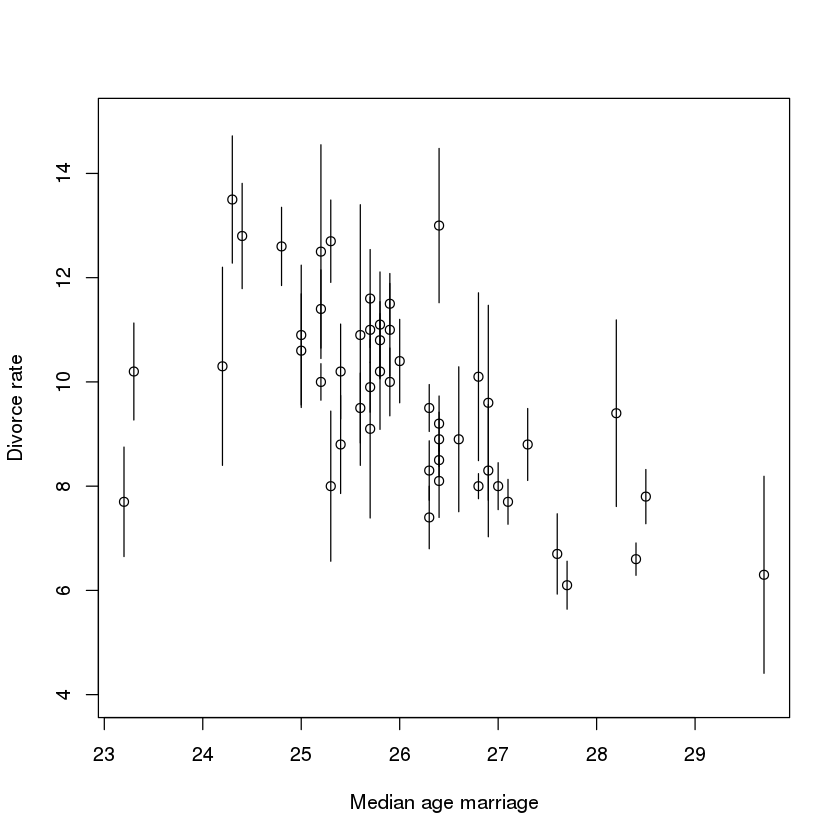

In [2]:
## R code 14.2
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# points
plot( d$Divorce ~ d$MedianAgeMarriage , ylim=c(4,15) ,
    xlab="Median age marriage" , ylab="Divorce rate" )

# standard errors
for ( i in 1:nrow(d) ) {
    ci <- d$Divorce[i] + c(-1,1)*d$Divorce.SE[i]
    x <- d$MedianAgeMarriage[i]
    lines( c(x,x) , ci )
}

In [3]:
## R code 14.3
dlist <- list(
    div_obs=d$Divorce,
    div_sd=d$Divorce.SE,
    R=d$Marriage,
    A=d$MedianAgeMarriage
)

m14.1 <- map2stan(
    alist(
        div_est ~ dnorm(mu,sigma),
        mu <- a + bA*A + bR*R,
        div_obs ~ dnorm(div_est,div_sd),
        a ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bR ~ dnorm(0,10),
        sigma ~ dcauchy(0,2.5)
    ) ,
    data=dlist ,
    start=list(div_est=dlist$div_obs) ,
    WAIC=FALSE , iter=5000 , warmup=1000 , chains=2 , cores=2 ,
    control=list(adapt_delta=0.95) )


SAMPLING FOR MODEL 'div_est ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000302 seconds (Sampling)
#                0.000305 seconds (Total)
# 


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [4]:
## R code 14.4
precis( m14.1 , depth=2 )

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

             Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
div_est[1]  11.77   0.67      10.74      12.87  8000    1
div_est[2]  11.18   1.06       9.52      12.86  8000    1
div_est[3]  10.47   0.61       9.45      11.41  8000    1
div_est[4]  12.32   0.87      10.93      13.73  8000    1
div_est[5]   8.05   0.24       7.68       8.43  8000    1
div_est[6]  11.01   0.74       9.85      12.20  8000    1
div_est[7]   7.24   0.64       6.20       8.27  8000    1
div_est[8]   9.35   0.89       7.93      10.77  8000    1
div_est[9]   6.99   1.10       5.13       8.63  8000    1
div_est[10]  8.54   0.30       8.04       9.02  8000    1
div_est[11] 11.14   0.53      10.31      12.01  8000    1
div_est[12]  9.09   0.91       7.63      10.50  8000    1
div_est[13]  9.69   0.92       8.30      11.22  4252    1
div_est[14]  8.12   0.41       7.46       8.79  8000    1
div_est[15] 10.69   0.56       9.80      11.58  8000    1
div_est[16] 10.17   0.71       9.04      11.28  8000    1
div_est[17] 10

In [5]:
## R code 14.5
dlist <- list(
    div_obs=d$Divorce,
    div_sd=d$Divorce.SE,
    mar_obs=d$Marriage,
    mar_sd=d$Marriage.SE,
    A=d$MedianAgeMarriage )

m14.2 <- map2stan(
    alist(
        div_est ~ dnorm(mu,sigma),
        mu <- a + bA*A + bR*mar_est[i],
        div_obs ~ dnorm(div_est,div_sd),
        mar_obs ~ dnorm(mar_est,mar_sd),
        a ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bR ~ dnorm(0,10),
        sigma ~ dcauchy(0,2.5)
    ) ,
    data=dlist ,
    start=list(div_est=dlist$div_obs,mar_est=dlist$mar_obs) ,
    WAIC=FALSE , iter=5000 , warmup=1000 , chains=3 , cores=3 ,
    control=list(adapt_delta=0.95) )

Warning message:
: There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help.Warning message:
: Examine the pairs() plot to diagnose sampling problems



SAMPLING FOR MODEL 'div_est ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000444 seconds (Sampling)
#                0.000447 seconds (Total)
# 


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(div_est ~ dnorm(mu, sigma), mu <- a + bA * A + : There were 1 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

In [6]:
## R code 14.6
library(rethinking)
data(milk)
d <- milk
d$neocortex.prop <- d$neocortex.perc / 100
d$logmass <- log(d$mass)

In [7]:
## R code 14.7
# prep data
data_list <- list(
    kcal = d$kcal.per.g,
    neocortex = d$neocortex.prop,
    logmass = d$logmass )

# fit model
m14.3 <- map2stan(
    alist(
        kcal ~ dnorm(mu,sigma),
        mu <- a + bN*neocortex + bM*logmass,
        neocortex ~ dnorm(nu,sigma_N),
        a ~ dnorm(0,100),
        c(bN,bM) ~ dnorm(0,10),
        nu ~ dnorm(0.5,1),
        sigma_N ~ dcauchy(0,1),
        sigma ~ dcauchy(0,1)
    ) ,
    data=data_list , iter=1e4 , chains=2 )

Imputing 12 missing values (NA) in variable 'neocortex'.



SAMPLING FOR MODEL 'kcal ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1, Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 32.2133 seconds (Warm-up)
#                33.986 seconds (Sampling)
#                66.1992 seconds (Total)
# 

SAMPLING FOR MODEL 'kcal ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 2, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 2, Iteration: 2000 / 1000

Computing WAIC
Constructing posterior predictions


[ 10000 / 10000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(kcal ~ dnorm(mu, sigma), mu <- a + bN * neocortex + : There were 1 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

In [8]:
## R code 14.8
precis(m14.3,depth=2)

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In precis(m14.3, depth = 2): There were 1 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

                      Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
neocortex_impute[1]   0.63   0.05       0.55       0.71  6940    1
neocortex_impute[2]   0.63   0.05       0.54       0.70  6396    1
neocortex_impute[3]   0.62   0.05       0.54       0.70  6279    1
neocortex_impute[4]   0.65   0.05       0.58       0.73  8785    1
neocortex_impute[5]   0.70   0.05       0.63       0.78  7548    1
neocortex_impute[6]   0.66   0.05       0.58       0.73  7190    1
neocortex_impute[7]   0.69   0.05       0.61       0.76  9521    1
neocortex_impute[8]   0.70   0.05       0.62       0.77  8358    1
neocortex_impute[9]   0.71   0.05       0.63       0.79  8270    1
neocortex_impute[10]  0.65   0.05       0.57       0.72  7775    1
neocortex_impute[11]  0.66   0.05       0.58       0.73  8415    1
neocortex_impute[12]  0.70   0.05       0.62       0.78  6781    1
a                    -0.54   0.48      -1.30       0.20  1479    1
bN                    1.91   0.75       0.78       3.13  1454 

In [9]:
## R code 14.9
# prep data
dcc <- d[ complete.cases(d$neocortex.prop) , ]
data_list_cc <- list(
    kcal = dcc$kcal.per.g,
    neocortex = dcc$neocortex.prop,
    logmass = dcc$logmass )

# fit model
m14.3cc <- map2stan(
    alist(
        kcal ~ dnorm(mu,sigma),
        mu <- a + bN*neocortex + bM*logmass,
        a ~ dnorm(0,100),
        c(bN,bM) ~ dnorm(0,10),
        sigma ~ dcauchy(0,1)
    ) ,
    data=data_list_cc , iter=1e4 , chains=2 )
precis(m14.3cc)


SAMPLING FOR MODEL 'kcal ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1, Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 10.2637 seconds (Warm-up)
#                9.3319 seconds (Sampling)
#                19.5956 seconds (Total)
# 

SAMPLING FOR MODEL 'kcal ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 2, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 2, Iteration: 2000 / 1000

Computing WAIC
Constructing posterior predictions


[ 10000 / 10000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a     -1.07   0.58      -2.00      -0.19  2024    1
bN     2.77   0.90       1.38       4.20  2000    1
bM    -0.10   0.03      -0.14      -0.05  2344    1
sigma  0.14   0.03       0.09       0.18  2533    1

In [10]:
## R code 14.10
m14.4 <- map2stan(
    alist(
        kcal ~ dnorm(mu,sigma),
        mu <- a + bN*neocortex + bM*logmass,
        neocortex ~ dnorm(nu,sigma_N),
        nu <- a_N + gM*logmass,
        a ~ dnorm(0,100),
        c(bN,bM,gM) ~ dnorm(0,10),
        a_N ~ dnorm(0.5,1),
        sigma_N ~ dcauchy(0,1),
        sigma ~ dcauchy(0,1)
    ) ,
    data=data_list , iter=1e4 , chains=2 )
precis(m14.4,depth=2)

Imputing 12 missing values (NA) in variable 'neocortex'.



SAMPLING FOR MODEL 'kcal ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1, Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 53.9982 seconds (Warm-up)
#                47.1217 seconds (Sampling)
#                101.12 seconds (Total)
# 

SAMPLING FOR MODEL 'kcal ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 2, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 2, Iteration: 2000 / 1000

Computing WAIC
Constructing posterior predictions


[ 10000 / 10000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

                      Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
neocortex_impute[1]   0.63   0.04       0.58       0.69  8651    1
neocortex_impute[2]   0.63   0.04       0.58       0.69 10000    1
neocortex_impute[3]   0.62   0.04       0.56       0.67 10000    1
neocortex_impute[4]   0.65   0.03       0.59       0.70 10000    1
neocortex_impute[5]   0.66   0.04       0.61       0.72  7504    1
neocortex_impute[6]   0.63   0.03       0.57       0.68 10000    1
neocortex_impute[7]   0.68   0.03       0.63       0.73 10000    1
neocortex_impute[8]   0.70   0.03       0.64       0.75 10000    1
neocortex_impute[9]   0.71   0.04       0.66       0.77 10000    1
neocortex_impute[10]  0.66   0.03       0.61       0.72 10000    1
neocortex_impute[11]  0.68   0.03       0.62       0.73 10000    1
neocortex_impute[12]  0.74   0.04       0.69       0.80 10000    1
a                    -0.87   0.48      -1.63      -0.10  2795    1
bN                    2.44   0.76       1.32       3.72  2756 

In [11]:
## R code 14.11
nc_missing <- ifelse( is.na(d$neocortex.prop) , 1 , 0 )
nc_missing <- sapply( 1:length(nc_missing) ,
    function(n) nc_missing[n]*sum(nc_missing[1:n]) )
nc_missing

[1]  0  1  2  3  4  0  0  0  5  0  0  0  0  6  7  0  8  0  9  0 10  0 11  0  0
[26] 12  0  0  0

In [12]:
## R code 14.12
nc <- ifelse( is.na(d$neocortex.prop) , -1 , d$neocortex.prop )

In [13]:
## R code 14.13
model_code <- '
data{
    int N;
    int nc_num_missing;
    vector[N] kcal;
    real neocortex[N];
    vector[N] logmass;
    int nc_missing[N];
}
parameters{
    real alpha;
    real<lower=0> sigma;
    real bN;
    real bM;
    vector[nc_num_missing] nc_impute;
    real mu_nc;
    real<lower=0> sigma_nc;
}
model{
    vector[N] mu;
    vector[N] nc_merged;
    alpha ~ normal(0,10);
    bN ~ normal(0,10);
    bM ~ normal(0,10);
    mu_nc ~ normal(0.5,1);
    sigma ~ cauchy(0,1);
    sigma_nc ~ cauchy(0,1);
    // merge missing and observed
    for ( i in 1:N ) {
        nc_merged[i] <- neocortex[i];
        if ( nc_missing[i] > 0 ) nc_merged[i] <- nc_impute[nc_missing[i]];
    }
    // imputation
    nc_merged ~ normal( mu_nc , sigma_nc );
    // regression
    mu <- alpha + bN*nc_merged + bM*logmass;
    kcal ~ normal( mu , sigma );
}'

In [14]:
## R code 14.14
data_list <- list(
    N = nrow(d),
    kcal = d$kcal.per.g,
    neocortex = nc,
    logmass = d$logmass,
    nc_missing = nc_missing,
    nc_num_missing = max(nc_missing)
)
start <- list(
    alpha=mean(d$kcal.per.g), sigma=sd(d$kcal.per.g),
    bN=0, bM=0, mu_nc=0.68, sigma_nc=0.06,
    nc_impute=rep( 0.5 , max(nc_missing) )
)
library(rstan)
m14.3stan <- stan( model_code=model_code , data=data_list , init=list(start) ,
    iter=1e4 , chains=1 )


SAMPLING FOR MODEL '13f91c6cf7550e20509fbf770122435e' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1, Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 32.957 seconds (Warm-up)
#                42.2772 seconds (Sampling)
#                75.2342 seconds (Total)
# 


In [15]:
## R code 14.15
set.seed(100)
x <- c( rnorm(10) , NA )
y <- c( rnorm(10,x) , 100 )
d <- list(x=x,y=y)